<a href="https://colab.research.google.com/github/yjyg1215/Project_DeepLearning/blob/main/genre_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영화 장르 자동 레이블링 시스템

## 가설: `영화 줄거리를 통해서 장르를 예측할 수 있다.`

### 1. 데이터 전처리

데이터셋: Kaggle - Wikipedia Movie Plot
* 선정 이유
  * 크롤링으로 데이터를 수집할까 생각했지만, 동적 크롤링을 진행해야 하는데 주어진 시간이 많지 않음...
  * API를 활용할 수는 없을까 찾아봤지만, 데이터를 받는 데 며칠이 소요됨...
  * 결국 Kaggle에서 가장 적절한 데이터셋을 찾아보기로 함.
  
  ***→ 줄거리를 포함하는 데이터셋이 많지 않은데, 그 중에서 가장 많은 row를 가지고 있고, 개봉 년도를 보면 1901년부터 2017년까지 넓은 범위의 영화를 포함하는 것 같아서 이 데이터셋을 선정함.***



In [57]:
import pandas as pd

movie=pd.read_csv("/content/drive/MyDrive/wiki_movie_plots_deduped.csv")
movie

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...


* 필요한 데이터는 'Genre'와 'Plot'이므로 두 컬럼만 추출합니다.

In [58]:
df=movie[['Genre','Plot']]
df

,Genre,Plot
0,unknown,"A bartender is working at a saloon, serving dr..."
1,unknown,"The moon, painted with a smiling face hangs ov..."
2,unknown,"The film, just over a minute long, is composed..."
3,unknown,Lasting just 61 seconds and consisting of two ...
4,unknown,The earliest known adaptation of the classic f...
...,...,...
34881,unknown,"The film begins in 1919, just after World War ..."
34882,comedy,"Two musicians, Salih and Gürkan, described the..."
34883,comedy,"Zafer, a sailor living with his mother Döndü i..."
34884,romantic comedy,The film centres around a young woman named Am...


* 결측치 제거

In [59]:
len(df[df['Genre']=='unknown'])

6083

In [60]:
drop_index=df[df['Genre']=='unknown'].index

In [61]:
df=df.drop(drop_index).reset_index(drop=True)
df

,Genre,Plot
0,western,The film opens with two bandits breaking into ...
1,comedy,The film is about a family who move to the sub...
2,short,The Rarebit Fiend gorges on Welsh rarebit at a...
3,short action/crime western,The film features a train traveling through th...
4,short film,Irish villager Kathleen is a tenant of Captain...
...,...,...
28798,drama film,"Zeynep lost her job at weaving factory, and he..."
28799,comedy,"Two musicians, Salih and Gürkan, described the..."
28800,comedy,"Zafer, a sailor living with his mother Döndü i..."
28801,romantic comedy,The film centres around a young woman named Am...


* 중복 데이터 삭제

In [62]:
df.duplicated().sum()

151

In [63]:
df=df.drop_duplicates().reset_index(drop=True)
df

,Genre,Plot
0,western,The film opens with two bandits breaking into ...
1,comedy,The film is about a family who move to the sub...
2,short,The Rarebit Fiend gorges on Welsh rarebit at a...
3,short action/crime western,The film features a train traveling through th...
4,short film,Irish villager Kathleen is a tenant of Captain...
...,...,...
28647,drama film,"Zeynep lost her job at weaving factory, and he..."
28648,comedy,"Two musicians, Salih and Gürkan, described the..."
28649,comedy,"Zafer, a sailor living with his mother Döndü i..."
28650,romantic comedy,The film centres around a young woman named Am...


* 장르가 몇 가지로 분류되어 있는지 확인합니다.

In [64]:
df['Genre'].nunique()

2264

In [65]:
pd.DataFrame(df['Genre'].unique())

,0
0,western
1,comedy
2,short
3,short action/crime western
4,short film
...,...
2259,sport film
2260,"animation, produced by glukoza production"
2261,"adventure, romance, fantasy film"
2262,ero


→ 카디널리티가 너무 높음. 가짓수를 줄여야 함.

* 장르별 빈도수 확인

In [72]:
df['Genre'].value_counts().head(50)

drama               5926
comedy              4364
horror              1152
action              1088
thriller             964
romance              921
western              857
crime                565
adventure            521
musical              465
romantic comedy      461
crime drama          460
science fiction      414
film noir            341
mystery              310
war                  272
animation            264
comedy, drama        235
sci-fi               218
family               217
fantasy              203
animated             195
musical comedy       154
comedy-drama         137
biography            136
anime                109
suspense             104
comedy drama         103
romantic drama       102
animated short        91
drama, romance        86
social                81
historical            77
action thriller       73
documentary           73
serial                70
world war ii          70
family drama          66
war drama             65
drama, crime          64


In [73]:
df['Genre'].value_counts().tail(50)

summer camp comedy                                     1
crime drama based on a true story                      1
drama based on the novel by stephen vizinczey          1
august 25                                              1
animation-drama                                        1
urban thriller                                         1
adventure fantasy                                      1
comedy sci-fi                                          1
coming-of-age                                          1
period comedy                                          1
tragic comedy                                          1
family comedy-drama                                    1
superhero/action                                       1
music/drama/romance                                    1
fantasy/thriller                                       1
martial arts/action/thriller                           1
comedy/family                                          1
horror/adventure               

→ crime drama는 crime으로, romantic comedy는 romance로, sci-fi는 science fiction으로, animated는 animation으로, anime는 animation으로, comedy drama는 comedy로 대체하기. 

In [74]:
df["Genre"].replace({"crime drama":"crime","romantic comedy": "romance","sci-fi": "science fiction","animated":"animation","anime":"animation","comedy, drama":"comedy"}, inplace=True)
drop_index=df[df['Genre']=="comedy, drama"].index
df=df.drop(drop_index)
df=df.reset_index(drop=True)

* 빈도수 200 이상의 장르만 추출

In [75]:
list_200 = df["Genre"].value_counts().reset_index(name="count").query("count > 200")["index"].tolist()
list_200

['drama',
 'comedy',
 'romance',
 'horror',
 'action',
 'crime',
 'thriller',
 'western',
 'science fiction',
 'animation',
 'adventure',
 'musical',
 'film noir',
 'mystery',
 'war',
 'family',
 'fantasy']

In [76]:
df = df[df["Genre"].isin(list_200)].reset_index(drop=True)
df

,Genre,Plot
0,western,The film opens with two bandits breaking into ...
1,comedy,The film is about a family who move to the sub...
2,comedy,Before heading out to a baseball game at a nea...
3,comedy,The plot is that of a black woman going to the...
4,drama,On a beautiful summer day a father and mother ...
...,...,...
20517,drama,"Through the night, three cars carry a small gr..."
20518,drama,The film opens with a Senegalese boy named Kha...
20519,comedy,"Two musicians, Salih and Gürkan, described the..."
20520,comedy,"Zafer, a sailor living with his mother Döndü i..."


In [77]:
df['Genre'].nunique()

17

→ 장르 17개로 구성된 20522개의 데이터셋 완성

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


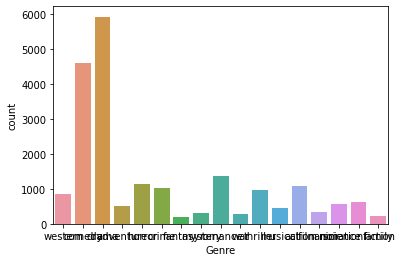

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['Genre'])

### 2. 모델링